In [1]:
pip install ultralytics torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.7 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Successfully loaded 'sample_image.jpg'.

0: 640x640 1 person, 418.7ms
Speed: 16.7ms preprocess, 418.7ms inference, 36.4ms postprocess per image at shape (1, 3, 640, 640)


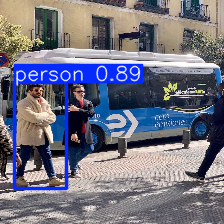

In [2]:
from ultralytics import YOLO
import cv2
import torch
import os # Import os module to check for file existence

# Load fastest YOLO model
model = YOLO("yolov8n.pt")

# Define the image path
image_path = "cifar_image.png"

# Load CIFAR image
img = cv2.imread(image_path)

# Check if image loading failed
if img is None:
    print(f"Warning: '{image_path}' not found or could not be loaded. Downloading a sample image.")
    # Download a sample image if cifar_image.png is not found
    sample_image_url = "https://ultralytics.com/images/bus.jpg" # A common sample image for YOLO
    sample_image_name = "sample_image.jpg"
    # Use os.system to download the image
    os.system(f"wget -q {sample_image_url} -O {sample_image_name}")
    img = cv2.imread(sample_image_name)
    if img is None:
        print("Error: Could not load sample image either. Please ensure you have an image file.")
        # You might want to raise an exception or handle this error more gracefully
        exit() # Stop execution if no image can be loaded
    else:
        print(f"Successfully loaded '{sample_image_name}'.")

# BEST PRACTICE: upscale clearly
img = cv2.resize(img, (224, 224))

# Run YOLO detection
results = model(
    img,
    conf=0.25,     # confidence threshold
    iou=0.45,      # overlap control
    max_det=1      # single main object
)

# Display result
results[0].show()